In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) # Full screen mode (feel free to zoom in and out)
from IPython.display import clear_output

import scipy.stats as st
import numpy as np
import math
import matplotlib.pyplot as plt

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.layouts import row
from bokeh.models import LinearColorMapper, BasicTicker, ColorBar
from bokeh.palettes import Category10, Accent
import bokeh
output_notebook()

/var/folders/2x/6rcq1qz10xn4qwq0yy9d4ytm0000gn/T/ipykernel_32392/3621377147.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Loading BokehJS ...

# Discretisation of SDE 
***

## SDE: Forward Euler Scheme
***
The forward Euler scheme for the SDE
\begin{align*}
X_{0} &:= x_0\\
dX_{t} &:= b(t,X_{t})dt + \sigma(t, X^n_{t}) dB_t\\
\end{align*}
is given by
\begin{align*}
X^n_{t_0} &:= x_0\\
X^n_{t_{i+1}} &:= X^n_{t_i} + b(t_i,X^n_{t_i})h + \sigma(t_i, X^n_{t_{i}}) B_{t_i,t_{i+1}}
\end{align*}
 for $i = 0,\dots,n-1$.



### Example: Geometric Browniam motion

\begin{equation}
\begin{cases}
X_0 = x_0\\
dX_t = X_t( \mu dt + \sigma dB_t ).
\end{cases}
\end{equation}

Let's simulate this SDE for $\mu = \sigma = 1$ according to the forward Euler scheme.

0

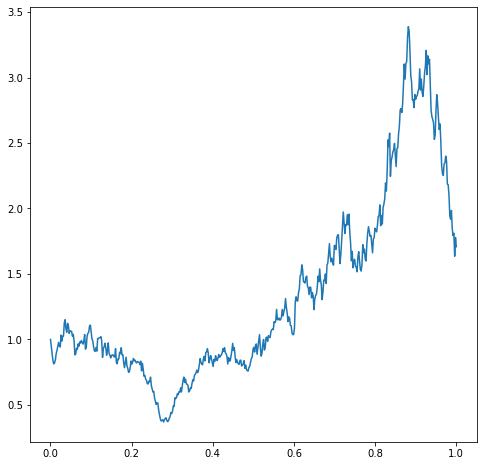

In [27]:
T = 1 # time horizon
N = 500 # number of points
h = T/N # time step
x0 = 1 # initial position

GBM = np.ones(N)*x0 # initialise numpy array

for i in range(1,N): # update according to the forward Euler scheme
    
    yi = np.random.normal() # Sampling from the Normal distribution
    
    GBM[i] = GBM[i-1] + 1*GBM[i-1]*h  + 1*GBM[i-1]*(yi*np.sqrt(h)) # Euler update


fig, ax = plt.subplots(1,figsize = (8,8)) # Plotting the path

xs = np.linspace(0,T,len(GBM))
ax.plot(xs,GBM)

max(GBM[-1] - 2,0)

### Example: Ornstein Uhlenbeck process

\begin{equation}
\begin{cases}
X_0 = x_0\\
dX_t = \theta(\mu - X_t) dt + \sigma dB_t .
\end{cases}
\end{equation}

Let's simulate this SDE for $\mu = \sigma = 1$ and $\theta = 1/2$ according to the forward Euler scheme.

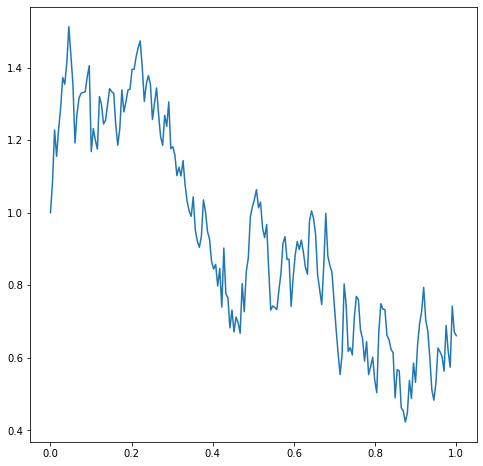

In [163]:
T = 1 # time horizon
N = 200 # number of points
h = T/N # time step
x0 = 1 # initial position

OU = np.ones(N)*x0 # initialise numpy array


for i in range(1,N): # update according to the forward Euler scheme
    
    yi = np.random.normal() # Sampling from the Normal distribution
    
    OU[i] = OU[i-1] + .5*(1-OU[i-1])*h  + 1*(yi*np.sqrt(h)) # Euler update


fig, ax = plt.subplots(1,figsize = (8,8)) # Plotting the path

xs = np.linspace(0,T,len(OU))
ax.plot(xs,OU)
# ax.plot(xs,GBM)

In [8]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_BM(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w